**Red Wine Classification**






Importing libraries

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


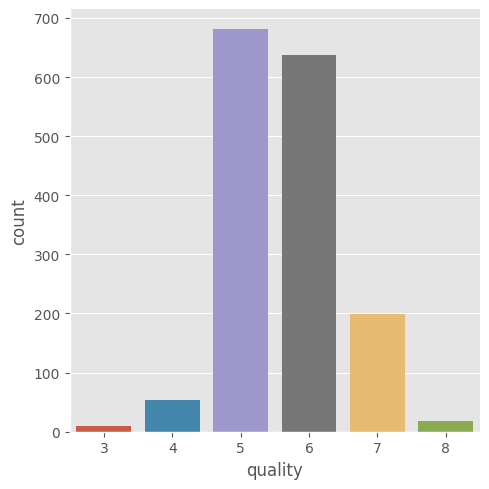

In [ ]:
#number of values for each quality
sns.catplot(x='quality', data=df, kind = 'count' )

<Axes: xlabel='quality', ylabel='volatile acidity'>

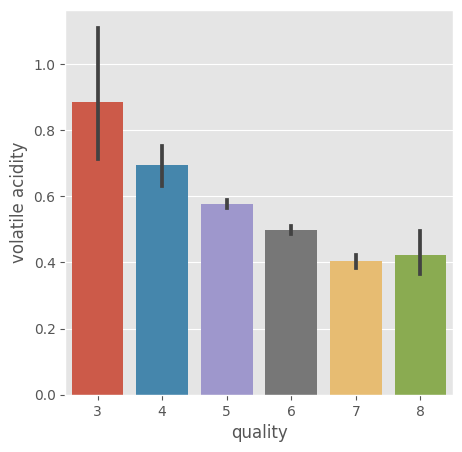

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

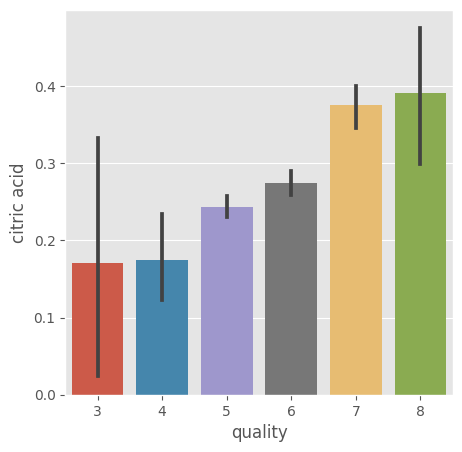

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='citric acid', data= df)

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

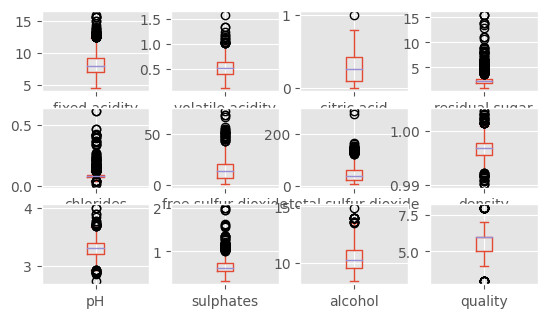

In [ ]:
df.plot(kind= 'box',subplots = True ,layout = (4,4),sharex = False )

Data Preprocessing

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'] = df['quality'].apply(lambda val: 1 if val >= 7 else 0)



In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# checking for null values

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

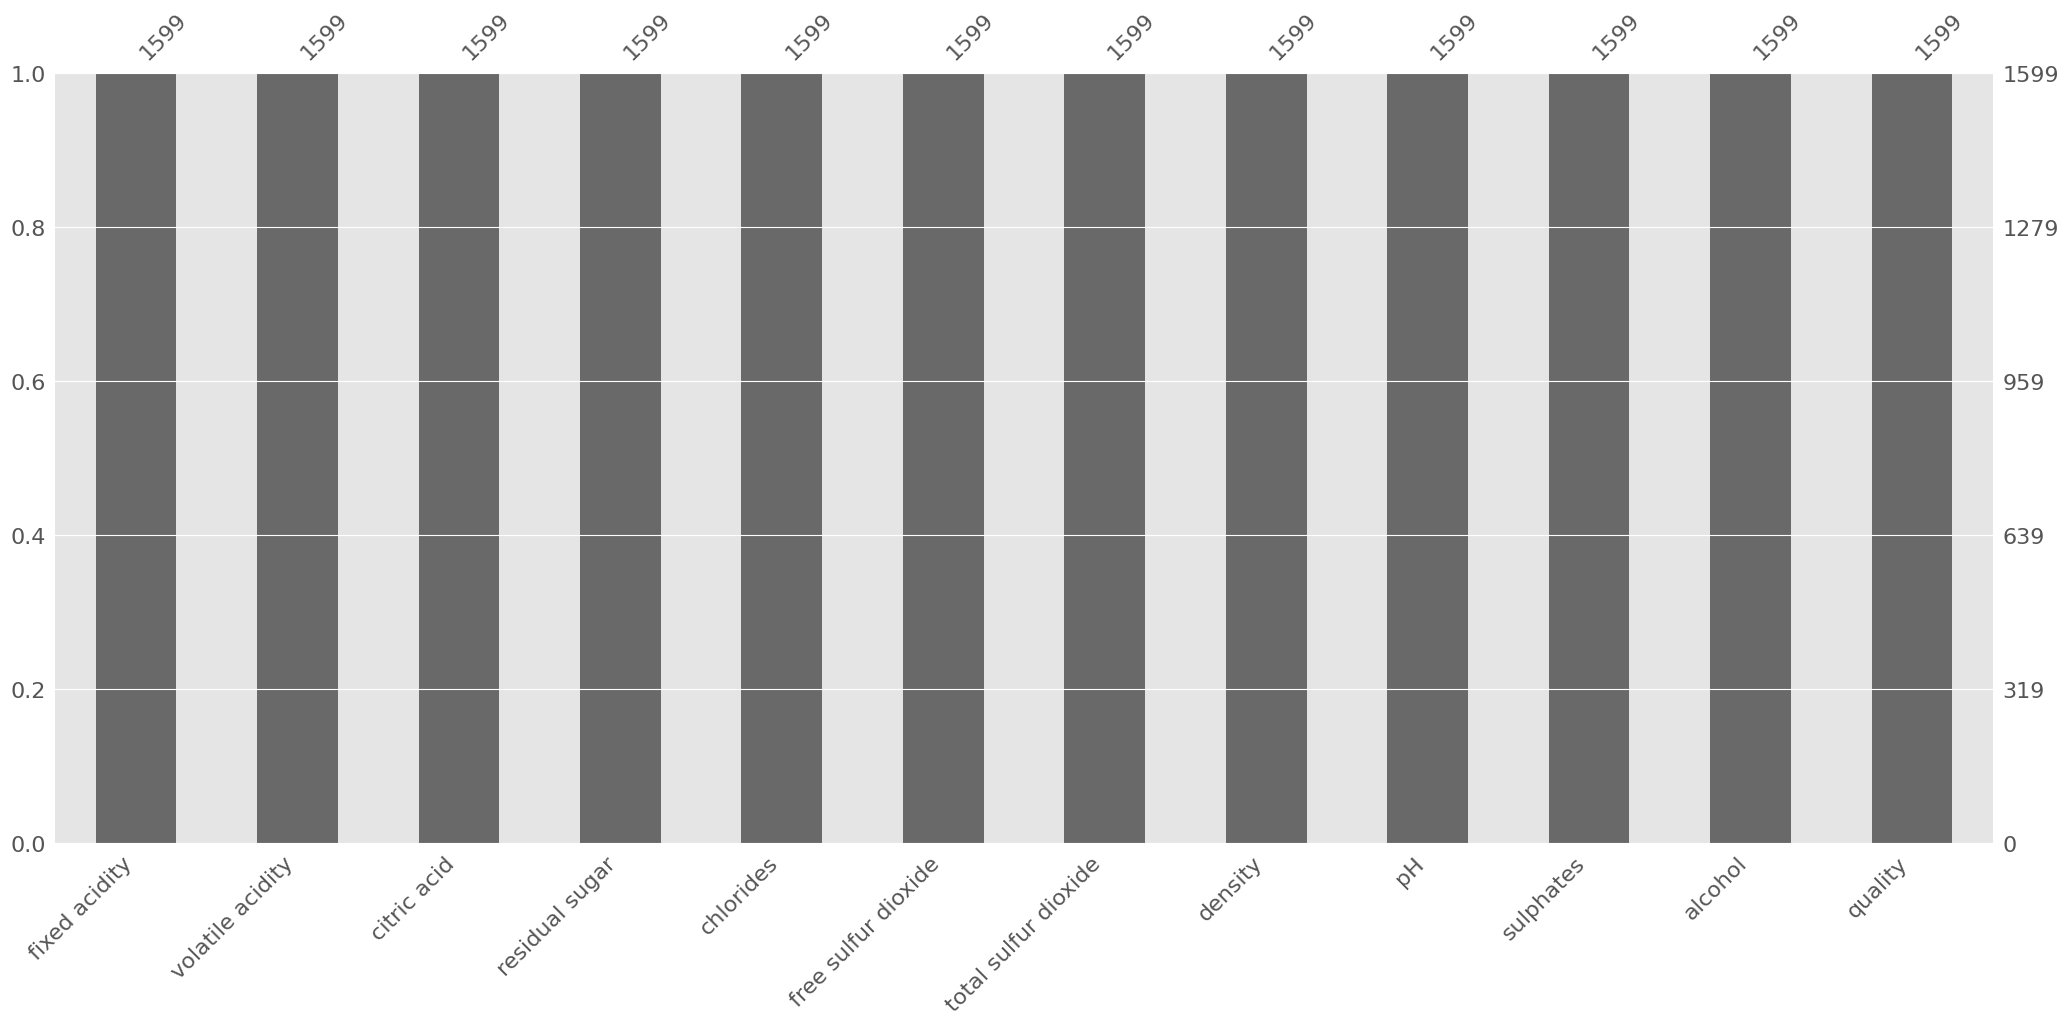

In [ ]:
# visualizing null values

msno.bar(df)

There are no missing values in the data.

Exploratory Data Analysis (EDA)

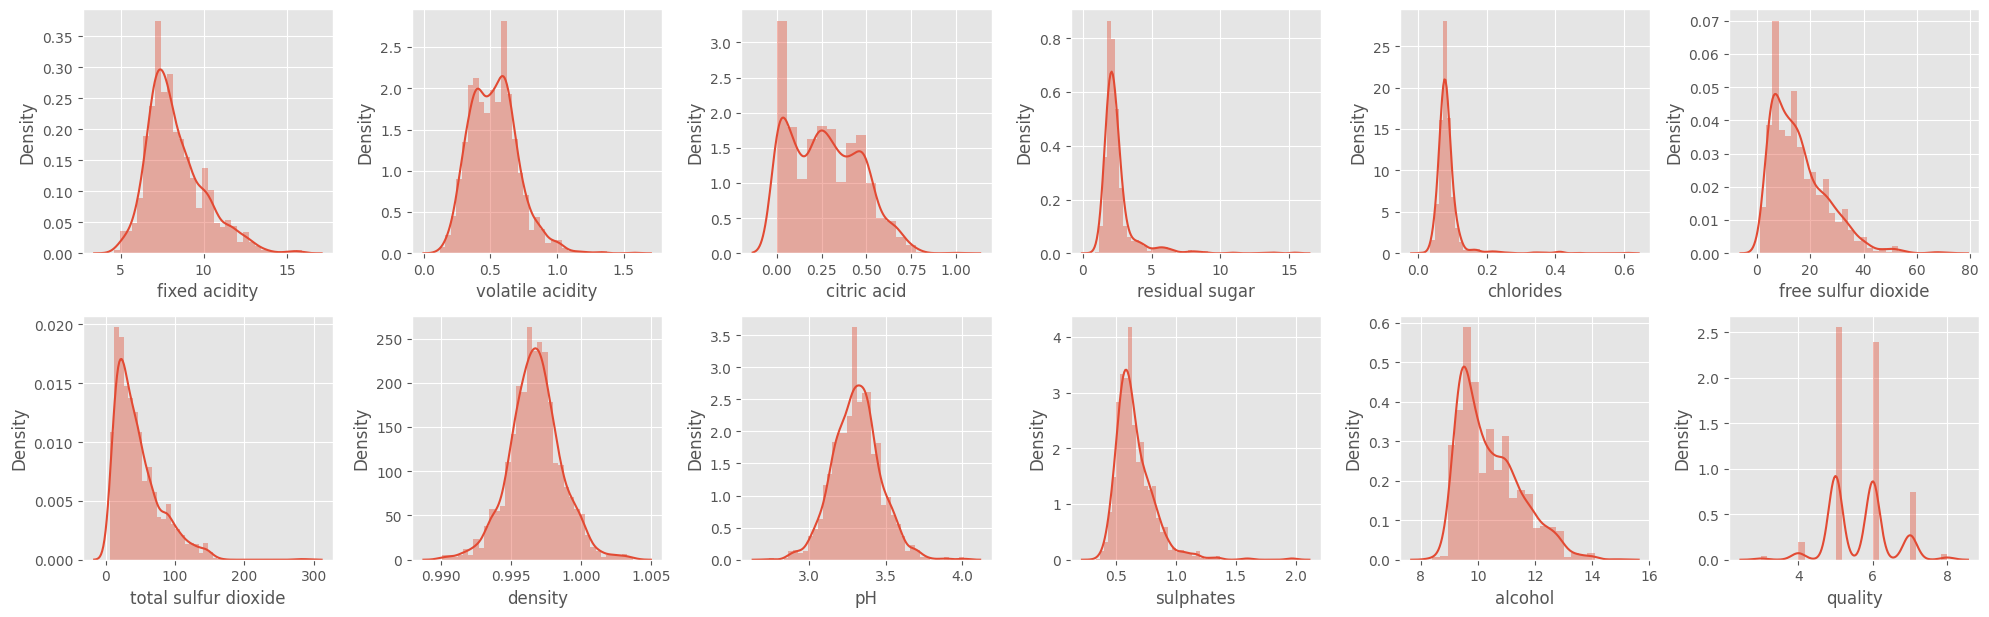

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

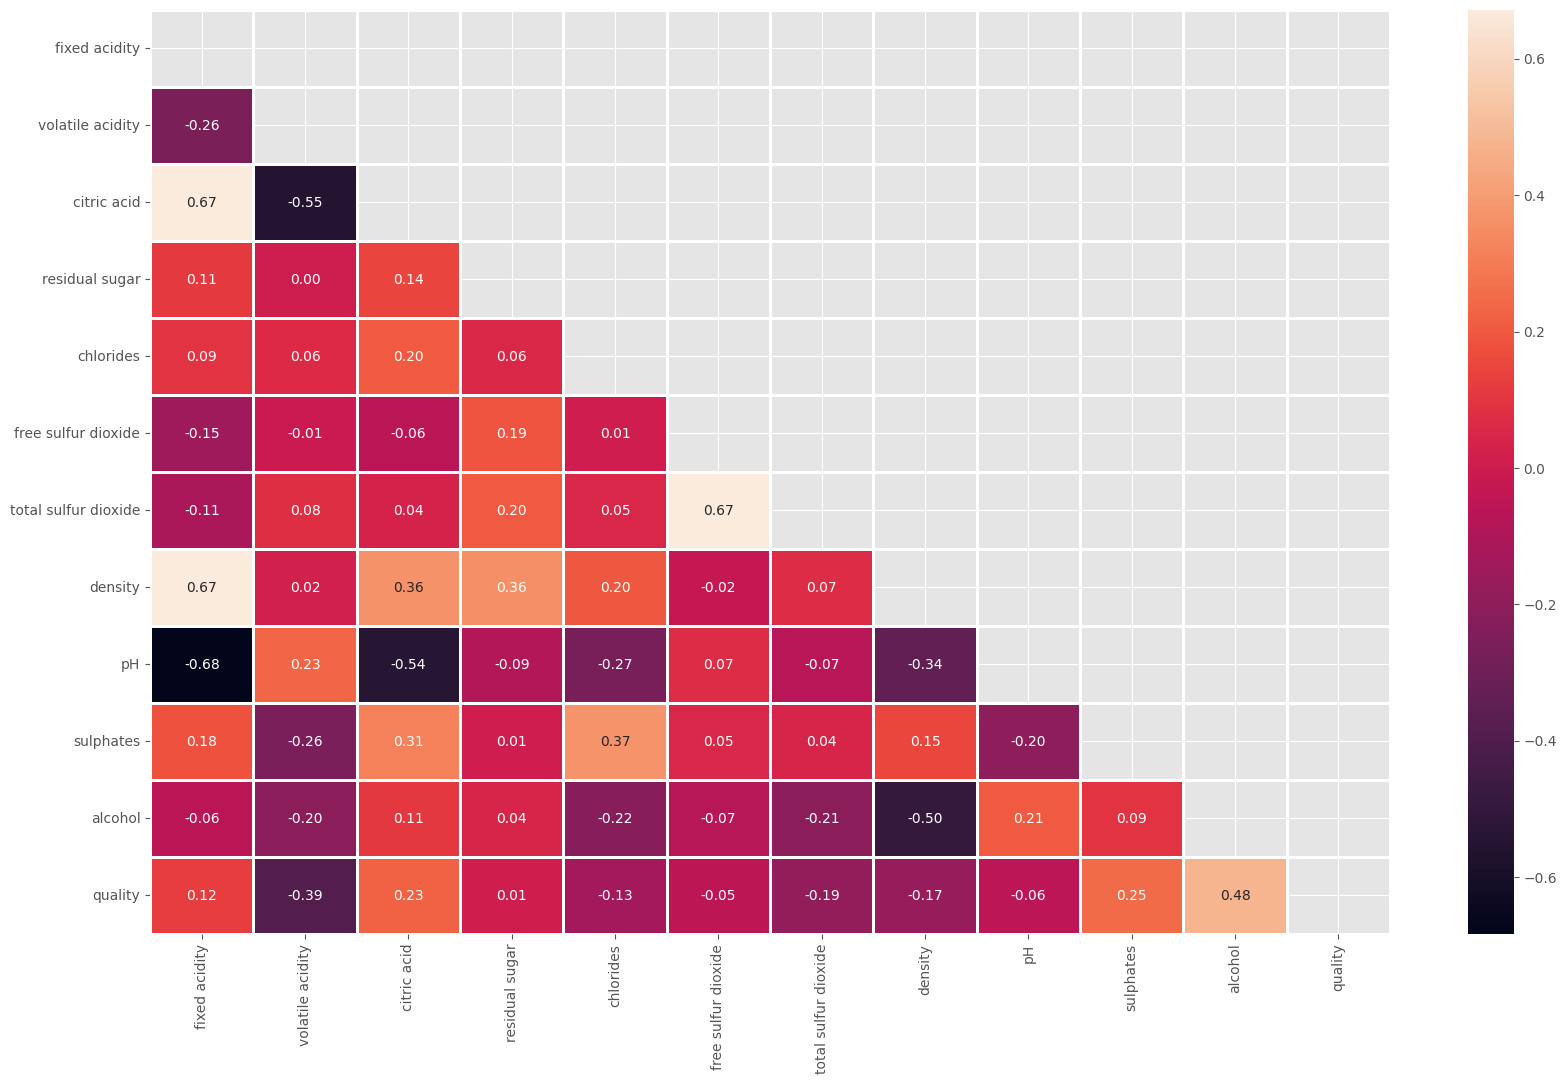

In [ ]:
# heatmap

plt.figure(figsize = (20, 12))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))


sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [ ]:
# removing highly correlated features
#feature selection or dimensionality reduction

corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'density', 'alcohol']
      residual sugar  chlorides  total sulfur dioxide    pH  sulphates  \
0                1.9      0.076                  34.0  3.51       0.56   
1                2.6      0.098                  67.0  3.20       0.68   
2                2.3      0.092                  54.0  3.26       0.65   
3                1.9      0.075                  60.0  3.16       0.58   
4                1.9      0.076                  34.0  3.51       0.56   
...              ...        ...                   ...   ...        ...   
1594             2.0      0.090                  44.0  3.45       0.58   
1595             2.2      0.062                  51.0  3.52       0.76   
1596             2.3      0.076                  40.0  3.42       0.75   
1597             2.0      0.075                  44.0  3.57       0.71   
1598             3.6      0.067                  42.0  3.39       0.66   

      quality

In [ ]:
# creating features and label

X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# model predictions

y_pred = log_reg.predict(X_test)

In [ ]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.871313672922252
0.8979166666666667


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       430
           1       0.51      0.38      0.44        50

    accuracy                           0.90       480
   macro avg       0.72      0.67      0.69       480
weighted avg       0.89      0.90      0.89       480



In [ ]:
model_res = pd.DataFrame(columns = ['Model ', 'Score' ] )
model_res.loc[len(model_res)]= ['LogisticRegression', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917


**K Neighbors Classifier (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions

y_pred = knn.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8972296693476318
0.8833333333333333


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[400  30]
 [ 26  24]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       430
           1       0.44      0.48      0.46        50

    accuracy                           0.88       480
   macro avg       0.69      0.71      0.70       480
weighted avg       0.89      0.88      0.89       480



In [ ]:
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333


**Support Vector Classifier (SVC)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
# best parameters

grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
# best accuracy

grid_search.best_score_

0.8731021780909674

In [ ]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
# model predictions

y_pred = svc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.8793565683646113
0.9020833333333333


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[418  12]
 [ 35  15]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       430
           1       0.56      0.30      0.39        50

    accuracy                           0.90       480
   macro avg       0.74      0.64      0.67       480
weighted avg       0.88      0.90      0.89       480



In [ ]:
model_res.loc[len(model_res)] = ['SVC', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083


**SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [ ]:
# best parameter

grid_search.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}

In [ ]:
sgd = SGDClassifier(alpha = 0.001, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log')

In [ ]:
# model predictions

y_pred = sgd.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.8659517426273459
0.9020833333333333


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[421   9]
 [ 38  12]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       430
           1       0.57      0.24      0.34        50

    accuracy                           0.90       480
   macro avg       0.74      0.61      0.64       480
weighted avg       0.88      0.90      0.88       480



In [ ]:
model_res.loc[len(model_res)] = ['SGD', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'splitter': 'random'}

In [ ]:
# best score

grid_search_dt.best_score_

0.8820467648942986

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9508489722966935
0.9166666666666666


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[409  21]
 [ 19  31]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       430
           1       0.60      0.62      0.61        50

    accuracy                           0.92       480
   macro avg       0.78      0.79      0.78       480
weighted avg       0.92      0.92      0.92       480



In [ ]:
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667


GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model3= GaussianNB()
model3.fit(X_train,y_train )
y_pred = model3.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['GaussianNB', accuracy_score(y_test,y_pred)]
model_res

accuracy score: 0.8145833333333333


,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9910634495084897
0.9125


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[413  17]
 [ 25  25]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       430
           1       0.60      0.50      0.54        50

    accuracy                           0.91       480
   macro avg       0.77      0.73      0.75       480
weighted avg       0.91      0.91      0.91       480



In [ ]:
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=28,
                                                     min_samples_split=8,
                                                     splitter='random'))])

In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, vc.predict(X_train)))

vc_acc = accuracy_score(y_test, y_pred)
print(vc_acc)

0.8829311885612153
0.9041666666666667


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[419  11]
 [ 35  15]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       430
           1       0.58      0.30      0.39        50

    accuracy                           0.90       480
   macro avg       0.75      0.64      0.67       480
weighted avg       0.89      0.90      0.89       480



In [ ]:
model_res.loc[len(model_res)] = ['Voting Classifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500
7,RandomForestClassifier,0.904167
8,Voting Classifier,0.904167


# **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=28,
                                                    min_samples_split=8,
                                                    splitter='random'),
                   n_estimators=180)

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, ada.predict(X_train)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

1.0
0.94375


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[424   6]
 [ 21  29]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       430
           1       0.83      0.58      0.68        50

    accuracy                           0.94       480
   macro avg       0.89      0.78      0.83       480
weighted avg       0.94      0.94      0.94       480



In [ ]:
model_res.loc[len(model_res)] = ['ADA Boost Classifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500
7,RandomForestClassifier,0.904167
8,Voting Classifier,0.904167
9,ADA Boost Classifier,0.943750


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
# best parameters

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 200}

In [ ]:
# best score

grid_search_gbc.best_score_

0.8909953555413196

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.90625


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[401  29]
 [ 16  34]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       430
           1       0.54      0.68      0.60        50

    accuracy                           0.91       480
   macro avg       0.75      0.81      0.77       480
weighted avg       0.92      0.91      0.91       480



In [ ]:
model_res.loc[len(model_res)] = ['Gradient Boosting Classifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500
7,RandomForestClassifier,0.904167
8,Voting Classifier,0.904167
9,ADA Boost Classifier,0.943750


# **Stochastic Gradient Boosting (SGB)**

In [ ]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)

sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [ ]:
y_pred = sgbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, sgbc.predict(X_train)))

sgbc_acc = accuracy_score(y_test, y_pred)
print(sgbc_acc)

1.0
0.9145833333333333


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[405  25]
 [ 16  34]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       430
           1       0.58      0.68      0.62        50

    accuracy                           0.91       480
   macro avg       0.77      0.81      0.79       480
weighted avg       0.92      0.91      0.92       480



In [ ]:
model_res.loc[len(model_res)] = ['Stochastic Gradient Boosting', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500
7,RandomForestClassifier,0.904167
8,Voting Classifier,0.904167
9,ADA Boost Classifier,0.943750


# **Extreme Gradient Boosting**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

1.0
0.9083333333333333


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[402  28]
 [ 16  34]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       430
           1       0.55      0.68      0.61        50

    accuracy                           0.91       480
   macro avg       0.76      0.81      0.78       480
weighted avg       0.92      0.91      0.91       480



In [ ]:
model_res.loc[len(model_res)] = ['XG boost', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.897917
1,KNeighborsClassifier,0.883333
2,SVC,0.902083
3,SGD,0.902083
4,DecisionTreeClassifier,0.916667
5,GaussianNB,0.814583
6,RandomForestClassifier,0.912500
7,RandomForestClassifier,0.904167
8,Voting Classifier,0.904167
9,ADA Boost Classifier,0.943750


In [ ]:
input_data = (7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8)
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we are predicting the label for one value only

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction = rand_clf.predict(input_data_reshaped)
print(prediction )
if (prediction[0]==1):
  print("Good QualityWine")
else:
  print("Bad Quality Wine ")

[0]
Bad Quality Wine 
